In [11]:
# PR曲线画法
# 学习机器学习算法 一直对PR曲线迷迷糊糊，此次重新梳理一下
# 用于生成PR曲线的数据为随机数据，不能代表真正模型预测评估，只用于完成PR曲线
# @author huzhixin
# @email zhixinhu at qq.com

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [13]:
# 产生两组 0到1之间的随机数

# 演示数据1
rand_1 = list(np.random.random(20))

# 生成标签和预测概率数据
test_1 = []
for i in range(20):
    label = "P" if i < 10 else "N"
    test_1.append({"value": rand_1[i], "label": label})

# 对概率进行排序
rand_1.sort(reverse=True)

# 演示数据2
rand_2 = list(np.random.random(20))

# 生成标签和预测概率数据
test_2 = []
for i in range(20):
    label = "P" if i < 10 else "N"
    test_2.append({"value": rand_2[i], "label": label})

# 对概率进行排序
rand_2.sort(reverse=True)

In [14]:
# 计算PR值
# values 模型预测的所有样本为正的概率列表
# data 模型预测的数据与样本自身正确标签

def get_pr(values=[], datas=[]):
    
    pr = []
    
    for value in values:
        counts = {"TP": 0, "FP": 0, "TN": 0, "FN": 0}
        for data in datas:
            predict_label = "P" if data["value"] >= value else "N"
            if predict_label == "P" and data["label"] == "P":
                counts["TP"] += 1
            elif predict_label == "P" and data["label"] == "N":
                counts["FP"] += 1
            elif predict_label == "N" and data["label"] == "N":
                counts["TN"] += 1
            elif predict_label == "N" and data["label"] == "P":
                counts["FN"] += 1
        # 计算查准率
        p = round(counts["TP"]/(counts["TP"]+counts["FP"]), 2)

        # 计算查全率
        r = round(counts["TP"]/(counts["TP"]+counts["FN"]), 2)
        pr.append({"p": p, "r": r})
    
    return pr

In [15]:
pr_1 = get_pr(rand_1, test_1)
pr_2 = get_pr(rand_2, test_2)

# 生成展示数据
data_show = []
for pr in pr_1:
    data_show.append({'p': pr['p'], 'r': pr['r'], 'model': 'model_1'})
    
for pr in pr_2:
    data_show.append({'p': pr['p'], 'r': pr['r'], 'model': 'model_2'})

for pr in range(20):
    value = (1.0/20)*pr
    data_show.append({'p': value, 'r': value, 'model': 'BEP'})
data_show = pd.DataFrame(data_show)

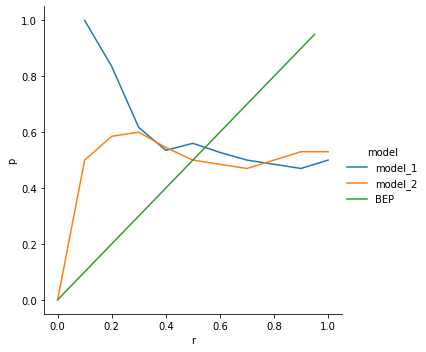

In [16]:
sns.relplot(x="r", y="p", ci=None, hue='model', kind="line", data=data_show);